<a href="https://colab.research.google.com/github/Bhar8at/DLR/blob/main/blur_automap1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import zipfile
from google.colab import files

# UPLOAD ZIP FILES
uploaded = files.upload()

# UNZIP ALL UPLOADED ZIP FILES
for fn in uploaded.keys():
    if fn.endswith(".zip"):
        with zipfile.ZipFile(fn, 'r') as zip_ref:
            zip_ref.extractall('./data')  # Extracts into a folder named 'data'

# LIST ALL FILES INSIDE EXTRACTED FOLDER
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import os
import zipfile
from google.colab import files

# UPLOAD ZIP FILES
uploaded = files.upload()

# UNZIP ALL UPLOADED ZIP FILES
for fn in uploaded.keys():
    if fn.endswith(".zip"):
        unzip_dir = fn.replace('.zip', '')
        with zipfile.ZipFile(fn, 'r') as zip_ref:
            zip_ref.extractall(f'./data/{unzip_dir}')  # Keeps folders organized

# LIST ALL FILES INSIDE EXTRACTED FOLDER
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Saving CT_64x64_RESIZED.zip to CT_64x64_RESIZED.zip
Saving sino_finallll.zip to sino_finallll.zip
./data/sino_finallll/51 (5)_sinogram.png
./data/sino_finallll/53 (2)_sinogram.png
./data/sino_finallll/107 (9)_sinogram.png
./data/sino_finallll/100 (12)_sinogram.png
./data/sino_finallll/95 (20) - Copy - Copy_sinogram.png
./data/sino_finallll/118 (16)_sinogram.png
./data/sino_finallll/122 (27)_sinogram.png
./data/sino_finallll/50 (7)_sinogram.png
./data/sino_finallll/49 (11)_sinogram.png
./data/sino_finallll/54 (17)_sinogram.png
./data/sino_finallll/96 (33) - Copy - Copy_sinogram.png
./data/sino_finallll/98 (24) - Copy - Copy_sinogram.png
./data/sino_finallll/96 (7) - Copy - Copy_sinogram.png
./data/sino_finallll/49 (33)_sinogram.png
./data/sino_finallll/120 (23)_sinogram.png
./data/sino_finallll/128 (15)_sinogram.png
./data/sino_finallll/51 (50)_sinogram.png
./data/sino_finallll/126 (16)_sinogram.png
./data/sino_finallll/121 (16)_sinogram.png
./data/sino_finallll/107 (14)_sinogram.png
./

In [ ]:
# IMPORTS FOR TRAINING AND IMAGE HANDLING
import tensorflow as tf
import os
import numpy as np
import time

# KERAS UTILITY TO CONVERT IMAGES TO ARRAYS
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
import zipfile
import os

# UNZIP ZIP FILES INTO STRUCTURED FOLDERS
with zipfile.ZipFile('/content/sino_finallll (1).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data/sino_finallll')

with zipfile.ZipFile('/content/CT_64x64_RESIZED (1).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data/CT_64x64_RESIZED')

# DEFINE INPUT AND OUTPUT DIRECTORIES
input_dir = '/content/data/sino_finallll'
output_dir = '/content/data/CT_64x64_RESIZED'

# LIST AND SORT FILENAMES FROM BOTH FOLDERS
input_files = sorted(os.listdir(input_dir))
output_files = sorted(os.listdir(output_dir))

# PRINT COUNTS TO VERIFY
print("Total input images:", len(input_files))
print("Total output images:", len(output_files))


FileNotFoundError: [Errno 2] No such file or directory: '/content/sino_finallll (1).zip'

In [ ]:
import os

# LISTS ALL SUBFOLDERS
# TO VERIFY IF EXTRACTED CORRECTLY
for root, dirs, files in os.walk('./data'):
    for d in dirs:
        print(os.path.join(root, d))


./data/sino_finallll
./data/CT_64x64_RESIZED


In [ ]:
# INITIALIZE LISTS TO STORE IMAGE ARRAYS
x_data = []
y_data = []

# LOOP THRU IMAGE PAIRS
for in_file, out_file in zip(input_files, output_files):
    # Load grayscale image and resize to (256, 256)
    input_img = load_img(os.path.join(input_dir, in_file), color_mode='grayscale', target_size=(363,256))
    output_img = load_img(os.path.join(output_dir, out_file), color_mode='grayscale', target_size=(256, 256))

    # Convert to array and normalize to [0, 1]
    x = img_to_array(input_img) / 255.0
    y = img_to_array(output_img) / 255.0

    x_data.append(x)
    y_data.append(y)

# CONVERT LISTS TO NUMPY ARRAYS
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

# PRINT SHAPES TO VERIFY DATA STRUCTURE
print("Input shape:", x_data.shape)   # (125, 256, 256, 1)
print("Output shape:", y_data.shape)  # (125, 256, 256, 1)

Input shape: (125, 363, 256, 1)
Output shape: (125, 256, 256, 1)


In [ ]:
# SPLIT DATASET INTO TRAINING AND TESTING SETS
x_train = x_data[:100]
x_test = x_data[100:]

y_train = y_data[:100]
y_test = y_data[100:]

In [ ]:
# PRINT SHAPES TO CONFIRM TRAINING DATA STRUCTURE
print(x_train.shape)
print(y_train.shape)

(100, 363, 256, 1)
(100, 256, 256, 1)


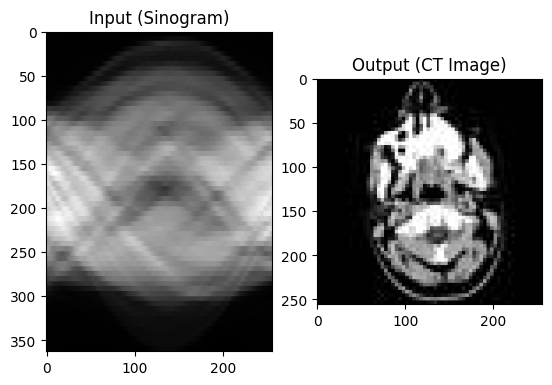

In [ ]:
import matplotlib.pyplot as plt

# DISPLAY SINOGRAM
plt.subplot(1, 2, 1)
plt.imshow(x_data[0].squeeze(), cmap='gray')
plt.title('Input (Sinogram)')

# DISPLAY CORRESPONDING IMAGE
plt.subplot(1, 2, 2)
plt.imshow(y_data[0].squeeze(), cmap='gray')
plt.title('Output (CT Image)')
plt.show()

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import(
    Conv2D, Conv2DTranspose, Dense, Flatten, Reshape, Input,
    UpSampling2D, Dropout
)

# AUTOMAP V2+ ARCHITECTURE
def build_automap_v2_plus(input_shape=(363, 256, 1), downscale_by=4, m1=32, m2=64):
    inputs = Input(shape=input_shape)

# Downscale large sinogram input
    downscale_x_to = input_shape[0] // downscale_by
    downscale_y_to = input_shape[1] // downscale_by
    x = layers.Resizing(downscale_x_to, downscale_y_to)(inputs)

# Flatten and map through Dense Layers (Automap style)
    x = Flatten()(x)
    x = Dense(2048, activation='tanh')(x)
    x = Dense(1024, activation='tanh')(x)  # Feature Bottleneck
    x = Dense(56 * 56, activation='tanh')(x)  # Prepare for Spatial Reshaping
    x = Reshape((56, 56, 1))(x)

# Convolutional refinement block with Dropout Regularization
    x = Conv2D(m1, (3, 3), padding='same', activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Conv2D(m2, (3, 3), padding='same', activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Conv2D(m2, (3, 3), padding='same', activation='relu')(x)
    x = Dropout(0.2)(x)

# Upsampling via Conv2DTranspose (Learned UpSampling)
    x = Conv2DTranspose(128, (3, 3), strides=2, padding='same', activation='relu')(x)  # 56 → 112
    x = Conv2DTranspose(64, (3, 3), strides=2, padding='same', activation='relu')(x)   # 112 → 224
    x = Conv2DTranspose(32, (3, 3), strides=2, padding='same', activation='relu')(x)   # 224 → 448

# Final Output layer with Sigmoid Activation for [0,1] pixel range
    x = Conv2DTranspose(1, (3, 3), padding='same', activation='sigmoid')(x)

# Crop from 448x448 to 256x256 to match ground truth
    x = layers.Cropping2D(((96, 96), (96, 96)))(x)


    return models.Model(inputs, x)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

# Build the model using Automap v2+ architecture
model = build_automap_v2_plus()

# Import VGG19 for Perceptual Loss
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

# Custom perceptual loss using VGG19
vgg = VGG19(include_top=False, weights='imagenet', input_shape=(256, 256, 3))
vgg.trainable = False
perceptual_model = tf.keras.Model(inputs=vgg.input, outputs=vgg.get_layer('block3_conv3').output)

# Compares Features of Prediction and Ground Truth
def perceptual_loss(y_true, y_pred):
    # Expand grayscale to RGB for VGG
    y_true_rgb = tf.image.grayscale_to_rgb(y_true)
    y_pred_rgb = tf.image.grayscale_to_rgb(y_pred)

    # Preprocess inputs for VGG
    y_true_rgb = preprocess_input(y_true_rgb * 255.0)
    y_pred_rgb = preprocess_input(y_pred_rgb * 255.0)

    # Extract intermediate features
    p_true = perceptual_model(y_true_rgb)
    p_pred = perceptual_model(y_pred_rgb)

    # Compute L2 distance between feature maps
    return tf.reduce_mean(tf.square(p_true - p_pred))


# Compile the model with optimizer and MSE Loss
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=MeanSquaredError(),
    metrics=[MeanAbsoluteError()]
)


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 363, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_7 (Resizing)           │ (None, 90, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2048)           │    11,798,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3136)           │     3,214,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_7 (Reshape)             │ (None, 56, 56, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 56, 56, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 112, 112, 128)  │        73,856 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 224, 224, 64)   │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_10             │ (None, 448, 448, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_11             │ (None, 448, 448, 1)    │           289 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping2d_3 (Cropping2D)       │ (None, 256, 256, 1)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,999,749 (198.36 MB)

 Trainable params: 17,333,249 (66.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,666,500 (132.24 MB)

In [ ]:
# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=4,         # Small Batch size to handle memory constraints
    epochs=300,           # Train for 300 full passes through the dataset
    verbose=1
)

Epoch 1/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - loss: 0.1873 - mean_absolute_error: 0.4008 - val_loss: 0.1757 - val_mean_absolute_error: 0.3886
Epoch 2/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1447 - mean_absolute_error: 0.3443 - val_loss: 0.0655 - val_mean_absolute_error: 0.1828
Epoch 3/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0682 - mean_absolute_error: 0.1676 - val_loss: 0.0563 - val_mean_absolute_error: 0.1791
Epoch 4/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0595 - mean_absolute_error: 0.1760 - val_loss: 0.0507 - val_mean_absolute_error: 0.1551
Epoch 5/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0550 - mean_absolute_error: 0.1568 - val_loss: 0.0490 - val_mean_absolute_error: 0.1530
Epoch 6/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0556 - mean_absolute_error: 0.1552 - val_loss: 0.0482 - val_mean_absolute_error: 0.1447
Epoch 7/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0531 - mean_absolute_error: 0.1489 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


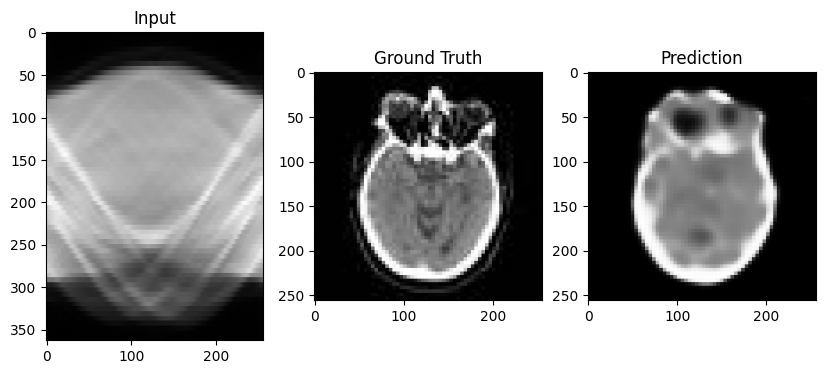

In [ ]:
import matplotlib.pyplot as plt

i = 5  # index of sample to test
pred = model.predict(x_test[i:i+1])[0]

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.title("Input")
plt.imshow(x_test[i].squeeze(), cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Ground Truth")
plt.imshow(y_test[i].squeeze(), cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Prediction")
plt.imshow(pred.squeeze(), cmap='gray')
plt.show()

In [ ]:
import tensorflow as tf

# Get prediction
pred = model.predict(x_test[i:i+1])  # shape: (1, 256, 256, 1)

# Extract image arrays
gt = y_test[i:i+1]

# PSNR
psnr_val = tf.image.psnr(gt, pred, max_val=1.0).numpy()[0]

# SSIM
ssim_val = tf.image.ssim(gt, pred, max_val=1.0).numpy()[0]

print(f"PSNR: {psnr_val:.2f} dB")
print(f"SSIM: {ssim_val:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
PSNR: 15.78 dB
SSIM: 0.5178
